# Основная информация

**Суть проекта** — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

**Цель проекта:** построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы

**Цель EDA:** первично проверить гипотезу о связи различных переменных с результатом госэкзамена по математике

**Задачи:**
* выявить параметры, влияющие на результаты госэкзамена по математике;
* отобрать наиболее важные переменные;
* обнаружить отклонения и выбросы.

**В дата сете представлены следующие данные**:
1. **school** — аббревиатура школы, в которой учится ученик
2. **sex** — пол ученика ('F' - женский, 'M' - мужской)
3. **age** — возраст ученика (от 15 до 22)
4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом)
5. **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)
6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. **failures** — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16. **schoolsup** — дополнительная образовательная поддержка (yes или no)
17. **famsup** — семейная образовательная поддержка (yes или no)
18. **paid** — дополнительные платные занятия по математике (yes или no)
19. **activities** — дополнительные внеучебные занятия (yes или no)
20. **nursery** — посещал детский сад (yes или no)
21. **granular_studytime** — 
22. **higher** — хочет получить высшее образование (yes или no)
23. **internet** — наличие интернета дома (yes или no)
24. **romantic** — в романтических отношениях (yes или no)
25. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
26. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)
27. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
28. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
29. **absences** — количество пропущенных занятий
20. **score** — баллы по госэкзамену по математике

**Этапы:**
1. Первичный отсмотр данных
2. Первичный анализ данных в столбцах
3. Анализ номинативных переменных
4. Коррелляционный анализ
5. Выводы


### Используемые функции

In [135]:
"Определяем кол-во пропущенных значений"
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("В таблице " + str(df.shape[1]) + " столбцов.\n"      
            "из них " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок имеют пропущенные значения.")
        return mis_val_table_ren_columns

In [136]:
"Анализ переменных"

def allocation(df_col):
    y = int(pd.DataFrame(stud_math.school).count())- int(pd.DataFrame(df_col).count())
    z = len(pd.DataFrame(df_col.value_counts()))
    return display(pd.DataFrame(df_col.value_counts())), print('В колонке:', 'уникальных значений -', z, 'пропущенных значений -', y)

In [137]:
"Определяем наличие выбросов"
def outliers(df_col):
    perc25 = df_col.quantile(0.25)
    perc75 = df_col.quantile(0.75)
    IQR = perc75 - perc25
    lower_border = perc25 - 1.5*IQR
    higher_border = perc75 + 1.5*IQR
    for i in df_col:
        if i <= lower_border or i >= higher_border:
            print('В колонке есть значения, которые могут считаться выбросами')
            break

In [138]:
"Определяем границы выбросов"
def outlier_scope(df_col):
    perc25 = df_col.quantile(0.25)
    perc75 = df_col.quantile(0.75)
    IQR = perc75 - perc25
    lower_border = perc25 - 1.5 * IQR
    higher_border = perc75 + 1.5 * IQR
    return("Границы выбросов:", lower_border, higher_border)

In [139]:
"Удаляем выбросы"
def remove_outlier(df, df_col):
    perc25 = df_col.quantile(0.25)
    perc75 = df_col.quantile(0.75)
    IQR = perc75 - perc25
    lower_border = perc25 - 1.5 * IQR
    higher_border = perc75 + 1.5 * IQR
    return df.loc[(df_col > lower_border) & (df_col < higher_border)]

In [140]:
"Определяем столбцы со статистически значимыми отклонениями"
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [141]:
"Строим гистограмму Density Plots"
def Density(df, df_col, x):
    types = df.dropna(subset=['score'])
    types = types[x].value_counts()
    types = list(types[types.values > 100].index)

    for b_type in types:

        subset = stud_math[df_col == b_type]

        sns.kdeplot(subset['score'].dropna(),
                   label = b_type, shade = False, alpha = 0.8);

    plt.xlabel('Score', size = 20); plt.ylabel('Density', size = 20); 
    plt.title('Density Plot Score', size = 28);

# Импорт библиотек

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings


# Очистка и форматирование данных

## Загрузка данных

In [143]:
warnings.filterwarnings('ignore') # запретим оповещения

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

stud_math = pd.read_csv('/Users/kseniahabipova/Downloads/stud_math.csv')

Выведем названия столбцов:

In [144]:
print(stud_math.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')


Переименуем некоторые из столбцов для удобства использования.

In [145]:
stud_math = stud_math.rename(columns={'Pstatus': 'parents_status', 'Medu': 'mother_education', 'Fedu': 'father_education',
                          'Mjob': 'mother_job', 'Fjob': 'father_job', 'schoolsup': 'school_support',
                          'famsup': 'family_support', 'paid': 'paid_math_course', 
                          'studytime, granular': 'granular_studytime', 'romantic': 'romantic_relations', 
                          'famrel': 'family_relations', 'goout': 'go_out'})

Посмотрим получившуюся таблицу:

In [146]:
stud_math.head()

,school,sex,age,address,famsize,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid_math_course,activities,nursery,granular_studytime,higher,internet,romantic_relations,family_relations,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## Типы данных и пропущенные значения

Таблица содержит 30 столбцов с данными. Посмотрим, какие типы данных присутствуют:

In [147]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   parents_status      350 non-null    object 
 6   mother_education    392 non-null    float64
 7   father_education    371 non-null    float64
 8   mother_job          376 non-null    object 
 9   father_job          359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  school_support      386 non-null    object 
 16  family_s

Для удобства анализа сконвертируем столбцы, имеющие значения "Yes" и "No" в тип "float"

In [148]:
# заменим значения yes = 0, no = 1
stud_math = stud_math.replace({'yes': 0.0, 'no': 1.0})

# заменим NaN, на "не число", интерпретируемое при чтении как число
stud_math = stud_math.replace({'NaN': np.nan})

# Конвертируем столбцы
for col in list(stud_math.columns):
    if ('school_support' in col or 'family_support' in col or 'paid_math_course' in col or 
        'activities' in col or 'nursery' in col or 'higher' in col or 'internet' in col in col or 
        'romantic_relations' in col):
        stud_math[col] = stud_math[col].astype(float)

## Пропущенные значения

Оценим кол-во пропущенных значений:

In [149]:
missing_values(stud_math)

В таблице 30 столбцов.
из них 27 колонок имеют пропущенные значения.


,Missing Values,% of Total Values
parents_status,45,11.4
paid_math_course,40,10.1
family_support,39,9.9
father_job,36,9.1
internet,34,8.6
romantic_relations,31,7.8
guardian,31,7.8
traveltime,28,7.1
family_relations,27,6.8
famsize,27,6.8


27 колонок имеют пропущенные значения. Доля пропущенных значений не превышает 11,5% В целом показатель не очень высокий, оставим все строки.

## Выбросы

Проверим наличие выбросов. Сначала посмотрим описание таблицы:

In [150]:
stud_math.describe()

,age,mother_education,father_education,traveltime,studytime,failures,school_support,family_support,paid_math_course,activities,nursery,granular_studytime,higher,internet,romantic_relations,family_relations,freetime,go_out,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,386.000000,356.000000,355.000000,381.000000,379.000000,388.000000,375.000000,361.000000,364.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,0.867876,0.384831,0.563380,0.488189,0.208443,-6.115979,0.050667,0.155125,0.659341,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,0.339065,0.487240,0.496667,0.500518,0.406732,2.526235,0.219609,0.362526,0.474583,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-3.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-3.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


В столбце father_education присутствует значение равное 40, скорее всего это опечатка. Заменим его на значение 4:

In [151]:
stud_math.father_education = stud_math.father_education.apply(lambda x: 4.0 if x == 40.0 else x)

В остальных столбцах визуально все дланнные в порядке, проверим каждый столбец отдельно:

### 1. school

In [152]:
allocation(stud_math.school)

,school
GP,349
MS,46


В колонке: уникальных значений - 2 пропущенных значений - 0


(None, None)

### 2. sex

In [153]:
allocation(stud_math.sex)

,sex
F,208
M,187


В колонке: уникальных значений - 2 пропущенных значений - 0


(None, None)

### 3. age

In [154]:
allocation(stud_math.age)

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


В колонке: уникальных значений - 8 пропущенных значений - 0


(None, None)

Посмотрим на распределение возрастов:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

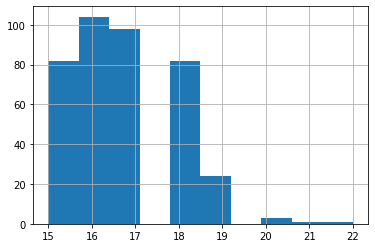

In [155]:
stud_math.age.hist()
stud_math.age.describe()

Распределение диспропорционально, есть вероятность наличия выбросов. Проверим это предположение:

In [156]:
outliers(stud_math.age)

В колонке есть значения, которые могут считаться выбросами


In [157]:
outlier_scope(stud_math.age)

('Границы выбросов:', 13.0, 21.0)

Как выбросы можно определить значения возрастов 21 год и старше. С точки зрения логики лучше удалить значения возрастов старше 20 лет, так как, судя по значениям, они случайны

In [158]:
stud_math = stud_math.loc[stud_math.age < 20]

### 4. address

In [159]:
allocation(stud_math.address)

,address
U,292
R,82


В колонке: уникальных значений - 2 пропущенных значений - 16


(None, None)

### 5. famsize

In [160]:
allocation(stud_math.famsize)

,famsize
GT3,257
LE3,106


В колонке: уникальных значений - 2 пропущенных значений - 27


(None, None)

### 6. parents_status

In [161]:
allocation(stud_math.parents_status)

,parents_status
T,311
A,34


В колонке: уникальных значений - 2 пропущенных значений - 45


(None, None)

### 7. mother_education

In [162]:
allocation(stud_math.mother_education)

,mother_education
4.0,130
2.0,101
3.0,95
1.0,58
0.0,3


В колонке: уникальных значений - 5 пропущенных значений - 3


(None, None)

Посмотрим на распределение значений:

count    387.000000
mean       2.751938
std        1.098970
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: mother_education, dtype: float64

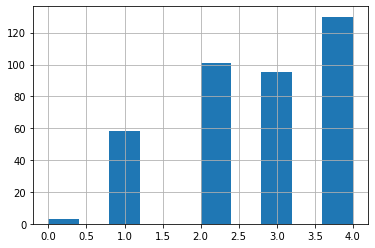

In [163]:
stud_math.mother_education.hist()
stud_math.mother_education.describe()

Значение 0.0 распределено диспропорционально. Для удаления диспропорции отфильтруем данное значение

In [164]:
stud_math = stud_math.loc[stud_math.mother_education >= 1.0]

In [165]:
allocation(stud_math.mother_education)

,mother_education
4.0,130
2.0,101
3.0,95
1.0,58


В колонке: уникальных значений - 4 пропущенных значений - 0


(None, None)

### 8. father_education

In [166]:
allocation(stud_math.father_education)

,father_education
2.0,100
3.0,95
4.0,89
1.0,74
0.0,2


В колонке: уникальных значений - 5 пропущенных значений - 24


(None, None)

Посмотрим на распределение значений:

count    360.000000
mean       2.541667
std        1.091082
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: father_education, dtype: float64

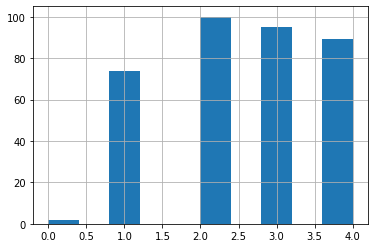

In [167]:
stud_math.father_education.hist()
stud_math.father_education.describe()

Значение 0.0 распределены диспропорционально. Для удаления диспропорции отфильтруем данное значение

In [168]:
stud_math = stud_math.loc[stud_math.father_education >= 1.0]

In [169]:
allocation(stud_math.father_education)

,father_education
2.0,100
3.0,95
4.0,89
1.0,74


В колонке: уникальных значений - 4 пропущенных значений - 0


(None, None)

### 9. mother_job

In [170]:
allocation(stud_math.mother_job)

,mother_job
other,120
services,87
at_home,55
teacher,47
health,30


В колонке: уникальных значений - 5 пропущенных значений - 19


(None, None)

### 10. father_job

In [171]:
allocation(stud_math.father_job)

,father_job
other,182
services,90
teacher,26
health,13
at_home,13


В колонке: уникальных значений - 5 пропущенных значений - 34


(None, None)

Отфильтруем значения, встречающиеся меньше 20 раз

In [172]:
stud_math = stud_math.loc[(stud_math.father_job != 'at_home')&(stud_math.father_job != 'health')]

In [173]:
allocation(stud_math.father_job)

,father_job
other,182
services,90
teacher,26


В колонке: уникальных значений - 3 пропущенных значений - 34


(None, None)

### 11. reason

In [174]:
allocation(stud_math.reason)

,reason
course,115
home,88
reputation,86
other,29


В колонке: уникальных значений - 4 пропущенных значений - 14


(None, None)

### 12. guardian

In [175]:
allocation(stud_math.guardian)

,guardian
mother,214
father,70
other,22


В колонке: уникальных значений - 3 пропущенных значений - 26


(None, None)

### 13. traveltime

In [176]:
allocation(stud_math.traveltime)

,traveltime
1.0,194
2.0,86
3.0,21
4.0,7


В колонке: уникальных значений - 4 пропущенных значений - 24


(None, None)

Посмотрим на распределение значений:

count    308.000000
mean       1.483766
std        0.723993
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

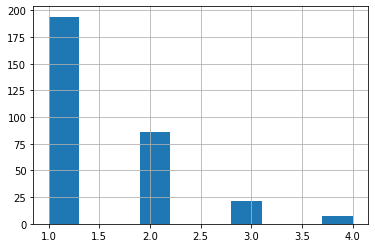

In [177]:
stud_math.traveltime.hist()
stud_math.traveltime.describe()

Значения 3.0 и 4.0 распределены диспропорционально. Для удаления диспропорции изменим значения таким образом, чтобы 2.0 соответствовало значению "путь до школы более 15 мин"

In [178]:
stud_math.traveltime = stud_math.traveltime.apply(lambda x: 2.0 if x == 3.0 else x)

In [179]:
stud_math.traveltime = stud_math.traveltime.apply(lambda x: 2.0 if x == 4.0 else x)

### 14. studyltime

In [181]:
allocation(stud_math.studytime)

,studytime
2.0,165
1.0,89
3.0,50
4.0,22


В колонке: уникальных значений - 4 пропущенных значений - 6


(None, None)

Посмотрим на распределение значений:

count    326.000000
mean       2.015337
std        0.835599
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

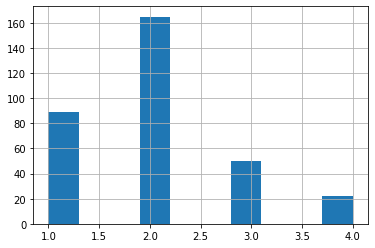

In [182]:
stud_math.studytime.hist()
stud_math.studytime.describe()

Значение 4.0 распределено диспропорционально. Для удаления диспропорции изменим значения таким образом, чтобы 4.0 соответствовало значению "время на учёбу помимо школы в неделю более 5 часов"

In [183]:
stud_math.studytime = stud_math.studytime.apply(lambda x: 3.0 if x == 4.0 else x)

### 15. failures

In [185]:
allocation(stud_math.failures)

,failures
0.0,253
1.0,39
3.0,12
2.0,11


В колонке: уникальных значений - 4 пропущенных значений - 17


(None, None)

Посмотрим на распределение значений:

count    315.000000
mean       0.307937
std        0.716347
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

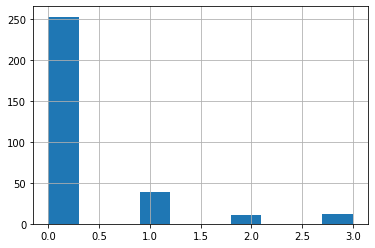

In [186]:
stud_math.failures.hist()
stud_math.failures.describe()

Значения, в которых зафиксировано кол-во провалов (1.0, 2.0, 3.0) распределены диспропорционально. Для удаления диспропорции изменим значения таким образом, в таблице фиксировались провалы в формате 1.0 (да) и 0.0 (нет)

In [187]:
stud_math.failures = stud_math.failures.apply(lambda x: 1.0 if x == 2.0 else x)

In [188]:
stud_math.failures = stud_math.failures.apply(lambda x: 1.0 if x == 3.0 else x)

### 16. school_support

In [189]:
allocation(stud_math.school_support)

,school_support
1.0,286
0.0,40


В колонке: уникальных значений - 2 пропущенных значений - 6


(None, None)

Посмотрим на распределение значений:

count    326.000000
mean       0.877301
std        0.328596
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: school_support, dtype: float64

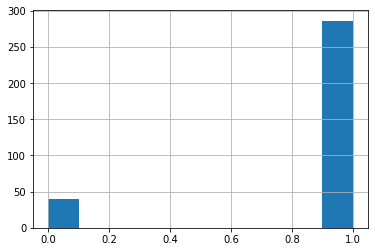

In [190]:
stud_math.school_support.hist()
stud_math.school_support.describe()

Видна диспропорция в распределении, но так как в таблице дано всего 2 варианта значения, пока вариантов оптимизации нет

### 17. family_support

In [191]:
allocation(stud_math.family_support)

,family_support
0.0,181
1.0,119


В колонке: уникальных значений - 2 пропущенных значений - 32


(None, None)

Посмотрим на распределение значений:

count    300.000000
mean       0.396667
std        0.490023
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: family_support, dtype: float64

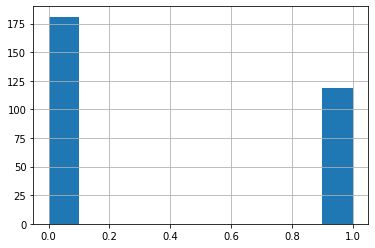

In [192]:
stud_math.family_support.hist()
stud_math.family_support.describe()

Диспропорций нет

### 18. paid_math_course

In [193]:
allocation(stud_math.paid_math_course)

,paid_math_course
1.0,167
0.0,129


В колонке: уникальных значений - 2 пропущенных значений - 36


(None, None)

Посмотрим на распределение значений:

count    296.000000
mean       0.564189
std        0.496702
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: paid_math_course, dtype: float64

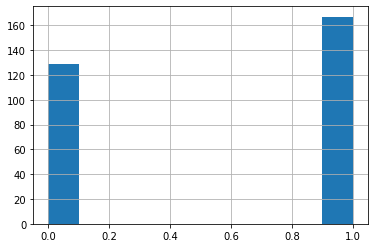

In [194]:
stud_math.paid_math_course.hist()
stud_math.paid_math_course.describe()

Диспропорций нет

### 19. activities

In [195]:
allocation(stud_math.activities)

,activities
0.0,164
1.0,155


В колонке: уникальных значений - 2 пропущенных значений - 13


(None, None)

Посмотрим на распределение значений:

count    319.000000
mean       0.485893
std        0.500586
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: activities, dtype: float64

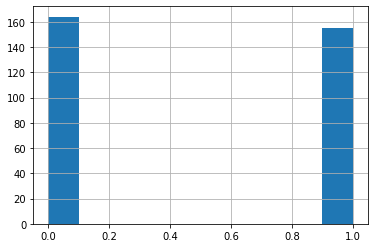

In [196]:
stud_math.activities.hist()
stud_math.activities.describe()

Диспропорций нет

### 20. nursery

In [197]:
allocation(stud_math.nursery)

,nursery
0.0,249
1.0,69


В колонке: уникальных значений - 2 пропущенных значений - 14


(None, None)

Посмотрим на распределение значений:

count    318.000000
mean       0.216981
std        0.412839
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: nursery, dtype: float64

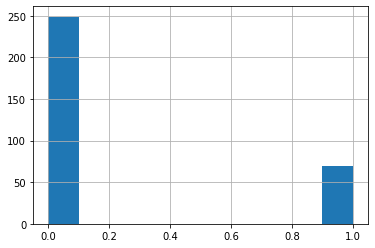

In [198]:
stud_math.nursery.hist()
stud_math.nursery.describe()

Есть небольшая диспропорция в распределении, но так как даны всего 2 варианта значений и оба значения достаточно велики, пока оставляем данные в таком виде

### 21. granular_studytime

In [199]:
allocation(stud_math.granular_studytime)

,granular_studytime
-6.0,165
-3.0,89
-9.0,50
-12.0,22


В колонке: уникальных значений - 4 пропущенных значений - 6


(None, None)

Посмотрим на распределение значений:

count    326.000000
mean      -6.046012
std        2.506797
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: granular_studytime, dtype: float64

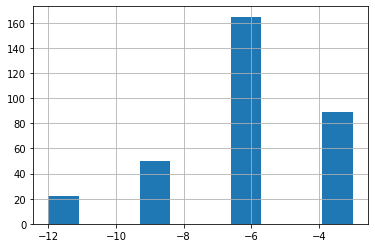

In [200]:
stud_math.granular_studytime.hist()
stud_math.granular_studytime.describe()

Распределение диспропорционально, есть вероятность наличия выбросов. Проверим это предположение:

In [201]:
outliers(stud_math.granular_studytime)

В колонке есть значения, которые могут считаться выбросами


In [202]:
outlier_scope(stud_math.granular_studytime)

('Границы выбросов:', -10.5, 1.5)

Отфильтруем значения, определенные как выбросы

In [203]:
stud_math = remove_outlier(stud_math, stud_math.granular_studytime)

### 22. higher

In [204]:
allocation(stud_math.higher)

,higher
0.0,275
1.0,15


В колонке: уникальных значений - 2 пропущенных значений - 14


(None, None)

В колонке всего 2 значения и одно из них встречается всего 15 раз. Удалим колонку

In [205]:
stud_math = stud_math.drop(['higher'], axis=1)

### 23. internet

In [206]:
allocation(stud_math.internet)

,internet
0.0,232
1.0,42


В колонке: уникальных значений - 2 пропущенных значений - 30


(None, None)

Посмотрим на распределение значений:

count    274.000000
mean       0.153285
std        0.360921
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: internet, dtype: float64

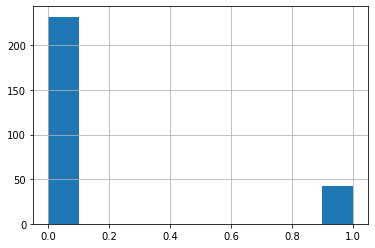

In [207]:
stud_math.internet.hist()
stud_math.internet.describe()

Есть диспропорция в распределении, но так как даны всего 2 варианта значений и оба значения достаточно велики, пока оставляем данные в таком виде

### 24. romantic_relations

In [208]:
allocation(stud_math.romantic_relations)

,romantic_relations
1.0,185
0.0,98


В колонке: уникальных значений - 2 пропущенных значений - 21


(None, None)

Посмотрим на распределение значений:

count    283.00000
mean       0.65371
std        0.47663
min        0.00000
25%        0.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: romantic_relations, dtype: float64

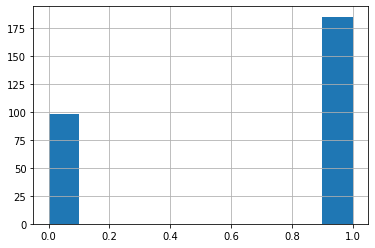

In [209]:
stud_math.romantic_relations.hist()
stud_math.romantic_relations.describe()

Диспропорции нет

### 25. family_relations

In [210]:
allocation(stud_math.family_relations)

,family_relations
4.0,142
5.0,77
3.0,43
2.0,14
1.0,5
-1.0,1


В колонке: уникальных значений - 6 пропущенных значений - 22


(None, None)

Посмотрим на распределение значений:

count    282.000000
mean       3.950355
std        0.934329
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_relations, dtype: float64

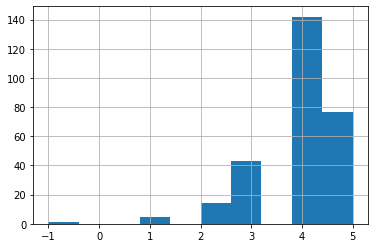

In [211]:
stud_math.family_relations.hist()
stud_math.family_relations.describe()

Есть диспропорция в распределении и есть в наличии отрицательные значения, которых не должно быть в данном столбце. Отфильтруем отрицаельные значения:

In [212]:
stud_math = stud_math.loc[stud_math.family_relations >= 1]

Есть диспропорция в распределении. Перегруппируем значения таким образом, чтобы шкала изменилась на: от 1.0 до 4.0 (от "плохо" до "отлично")

In [213]:
stud_math.family_relations = stud_math.family_relations.apply(lambda x: 1.0 if x == 2.0 else x)

In [214]:
stud_math.family_relations = stud_math.family_relations.apply(lambda x: 2.0 if x == 3.0 else x)

In [215]:
stud_math.family_relations = stud_math.family_relations.apply(lambda x: 3.0 if x == 4.0 else x)

In [216]:
stud_math.family_relations = stud_math.family_relations.apply(lambda x: 4.0 if x == 5.0 else x)

### 26. freetime

In [218]:
allocation(stud_math.freetime)

,freetime
3.0,111
4.0,82
2.0,47
5.0,23
1.0,12


В колонке: уникальных значений - 5 пропущенных значений - 6


(None, None)

Посмотрим на распределение значений:

count    275.000000
mean       3.207273
std        0.968831
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

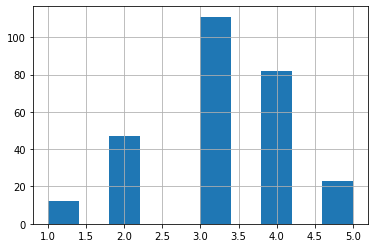

In [219]:
stud_math.freetime.hist()
stud_math.freetime.describe()

Есть диспропорция в распределении. Перегруппируем значения таким образом, чтобы шкала изменилась на: от 1.0 до 3.0 (от "мало" до "много")

In [220]:
stud_math.freetime = stud_math.freetime.apply(lambda x: 1.0 if x == 2.0 else x)

In [221]:
stud_math.freetime = stud_math.freetime.apply(lambda x: 2.0 if x == 3.0 else x)

In [222]:
stud_math.freetime = stud_math.freetime.apply(lambda x: 3.0 if x == 4.0 else x)

In [223]:
stud_math.freetime = stud_math.freetime.apply(lambda x: 3.0 if x == 5.0 else x)

### 27. go_out

In [225]:
allocation(stud_math.go_out)

,go_out
3.0,93
2.0,67
4.0,62
5.0,36
1.0,17


В колонке: уникальных значений - 5 пропущенных значений - 6


(None, None)

Посмотрим на распределение значений:

count    275.000000
mean       3.120000
std        1.109087
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

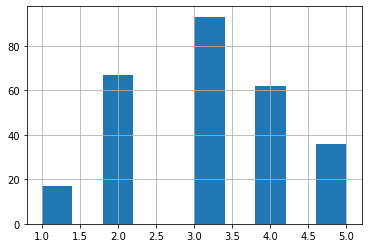

In [226]:
stud_math.go_out.hist()
stud_math.go_out.describe()

Есть диспропорция в распределении. Перегруппируем значения таким образом, чтобы шкала изменилась на: от 1.0 до 3.0 (от "Мало" до "Много)

In [227]:
stud_math.go_out = stud_math.go_out.apply(lambda x: 1.0 if x == 2.0 else x)

In [228]:
stud_math.go_out = stud_math.go_out.apply(lambda x: 2.0 if x == 3.0 else x)

In [229]:
stud_math.go_out = stud_math.go_out.apply(lambda x: 3.0 if x == 4.0 else x)

In [230]:
stud_math.go_out = stud_math.go_out.apply(lambda x: 3.0 if x == 5.0 else x)

### 28. health

In [232]:
allocation(stud_math.health)

,health
5.0,94
3.0,63
4.0,49
2.0,34
1.0,32


В колонке: уникальных значений - 5 пропущенных значений - 9


(None, None)

Посмотрим на распределение значений:

count    272.000000
mean       3.511029
std        1.379832
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

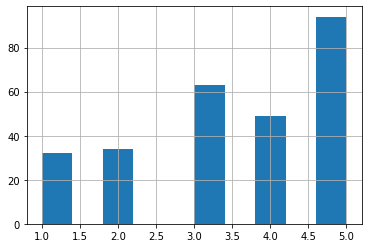

In [233]:
stud_math.health.hist()
stud_math.health.describe()

Диспропорции нет

### 29. absences

In [234]:
allocation(stud_math.absences)

,absences
0.0,79
2.0,43
4.0,39
6.0,21
8.0,16
10.0,12
12.0,8
14.0,8
3.0,7
16.0,6


В колонке: уникальных значений - 32 пропущенных значений - 9


(None, None)

Посмотрим на распределение значений:

count    272.000000
mean       7.176471
std       24.286993
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

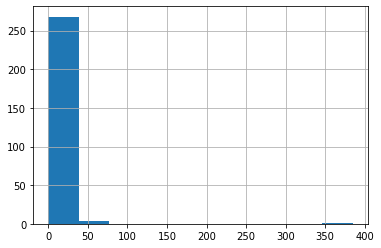

In [235]:
stud_math.absences.hist()
stud_math.absences.describe()

Распределение диспропорционально, есть вероятность наличия выбросов. Проверим это предположение:

In [236]:
outliers(stud_math.absences)

В колонке есть значения, которые могут считаться выбросами


Отфильтруем значения, определенные как выбросы

In [237]:
outlier_scope(stud_math.absences)

('Границы выбросов:', -12.0, 20.0)

In [238]:
stud_math = remove_outlier(stud_math, stud_math.absences)

### 30. score

In [239]:
allocation(stud_math.score)

,score
50.0,42
55.0,32
0.0,25
60.0,22
70.0,20
75.0,20
65.0,18
40.0,16
45.0,13
80.0,12


В колонке: уникальных значений - 16 пропущенных значений - 5


(None, None)

Посмотрим на распределение значений:

count    250.000000
mean      51.280000
std       22.328364
min        0.000000
25%       41.250000
50%       55.000000
75%       65.000000
max       95.000000
Name: score, dtype: float64

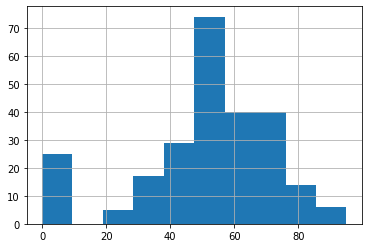

In [240]:
stud_math.score.hist()
stud_math.score.describe()

Распределение диспропорционально, есть вероятность наличия выбросов. Проверим это предположение:

In [241]:
outliers(stud_math.score)

В колонке есть значения, которые могут считаться выбросами


In [97]:
outlier_scope(stud_math.score)

('Границы выбросов:', 5.625, 100.625)

In [98]:
stud_math = remove_outlier(stud_math, stud_math.score)

count    225.000000
mean      56.977778
std       15.103052
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max       95.000000
Name: score, dtype: float64

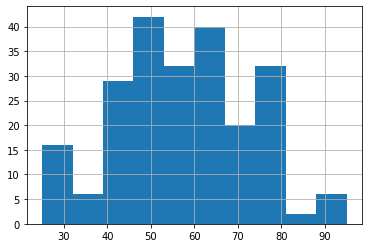

In [99]:
stud_math.score.hist()
stud_math.score.describe()

# Корреляционный анализ

Цель — это влияние условий жизни на успеваемость по математике (score в нашем наборе), так что целесообразно для начала понять, какое эта величина имеет распределение. Посмотрим на него, построив гистограмму

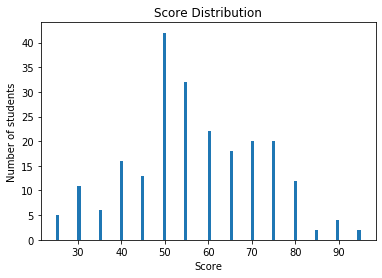

In [100]:
plt.hist(stud_math['score'].dropna(), bins = 100);
plt.xlabel('Score'); plt.ylabel('Number of students');
plt.title('Score Distribution');

В получившимся распределении видна диспропорция, значительная часть оценок равна 50 баллам.

## Анализ номинативных переменных

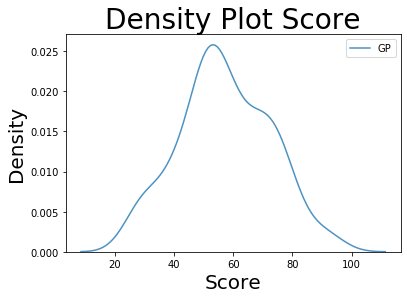

In [101]:
Density(stud_math, stud_math['school'], 'school')

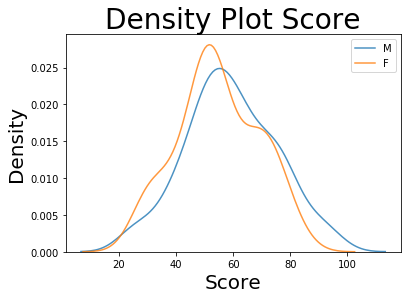

In [102]:
Density(stud_math, stud_math['sex'], 'sex')

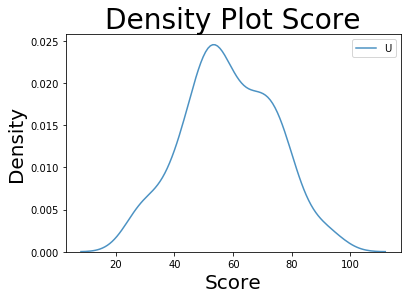

In [103]:
Density(stud_math, stud_math['address'], 'address')

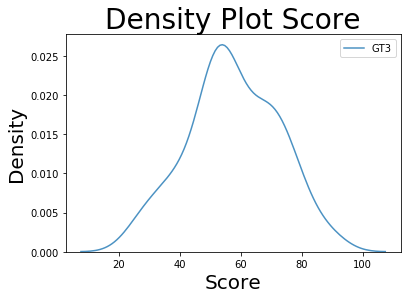

In [104]:
Density(stud_math, stud_math['famsize'], 'famsize')

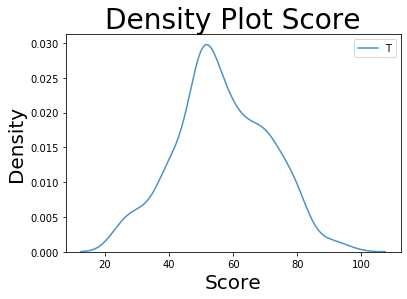

In [105]:
Density(stud_math, stud_math['parents_status'], 'parents_status')

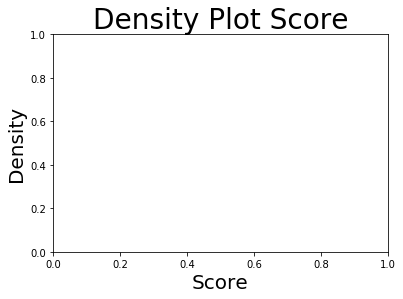

In [106]:
Density(stud_math, stud_math['mother_job'], 'mother_job')

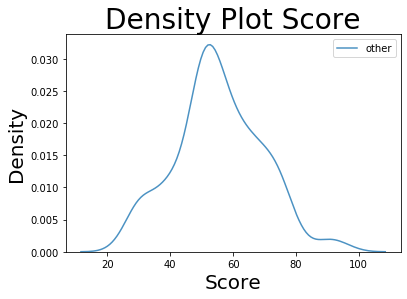

In [107]:
Density(stud_math, stud_math['father_job'], 'father_job')

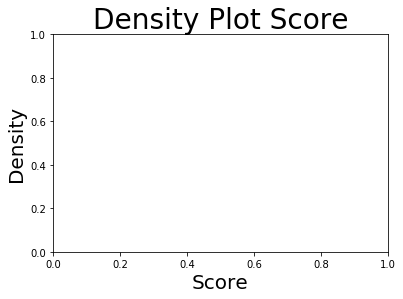

In [108]:
Density(stud_math, stud_math['reason'], 'reason')

Судя по получившимся графикам, значимое влияние на параметр "оценка" оказывает только пол студента. Дополнительно проверим данные:

In [109]:
for col in ['school', 'sex', 'address', 'famsize', 'parents_status', 
            'mother_job', 'father_job', 'reason', 'guardian']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_job


Оставим для дальнейшего анализа колонки "Пол" и "Адрес", "Профессия матери"

## Анализ числовых переменных

Проверим корелляцию столбца:

In [110]:
stud_math.corr()['score']

age                  -0.169454
mother_education      0.251464
father_education      0.215613
traveltime           -0.119777
studytime             0.102486
failures             -0.301835
school_support        0.188565
family_support        0.066438
paid_math_course      0.020896
activities           -0.069709
nursery              -0.048084
granular_studytime   -0.102486
internet             -0.075243
romantic_relations    0.033203
family_relations      0.034472
freetime             -0.058198
go_out               -0.155363
health               -0.043698
absences             -0.211798
score                 1.000000
Name: score, dtype: float64

Оставим для дальнейшей работы следующие столбцы:

In [111]:
stud_math_for_model = stud_math.loc[:, ['sex', 'age', 'address', 'mother_job', 'studytime', 'family_support', 
        'paid_math_course', 'activities', 'nursery', 'granular_studytime', 'internet', 'romantic_relations',
       'family_relations', 'freetime', 'health', 'score']]

stud_math_for_model.head()

,sex,age,address,mother_job,studytime,family_support,paid_math_course,activities,nursery,granular_studytime,internet,romantic_relations,family_relations,freetime,health,score
0,F,18,U,at_home,2.0,1.0,1.0,1.0,0.0,-6.0,NaN,1.0,4.0,4.0,3.0,30.0
1,F,17,U,at_home,2.0,0.0,1.0,1.0,1.0,-6.0,0.0,1.0,5.0,5.0,3.0,30.0
2,F,15,U,at_home,2.0,1.0,NaN,1.0,0.0,-6.0,0.0,NaN,4.0,2.0,3.0,50.0
3,F,15,U,health,3.0,0.0,0.0,0.0,0.0,-9.0,0.0,0.0,3.0,2.0,5.0,75.0
4,F,16,U,other,2.0,0.0,0.0,1.0,0.0,-6.0,1.0,1.0,4.0,2.0,5.0,50.0


# Выводы

В результате EDA для анализа влияния условий жизни на успеваемость школьников по математике были получены следующие выводы:

* В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
* Выбросы найдены только в 4 столбцах, что позволяет сделать вывод о том, что данные достаточно чистые.
* В части колонок недостаточно данных по некоторым показателям, поэтому для аналитики их лучше сгруппировать в более крупные группы;
* Положительная корреляция с параметрами профессии родителей может говорить о том, что родители с определенным профессиональным статусом начинают влиять на учебные успехи своих детей.
* Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'sex', 'age', 'address', 'mother_job', 'studytime', 'family_support','paid_math_course', 'activities', 'nursery', 'granular_studytime', 'internet', 'romantic_relations','family_relations', 'freetime', 'health'.